In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make

In [63]:
num_samples = 100

# The desired mean values of the sample.
mu = np.array([0,0])

# The desired covariance matrix.
r = np.array([
        [  1, .8],
        [.8,1]])

# Generate the random samples.
cor = np.random.multivariate_normal(mu, r, size=num_samples)

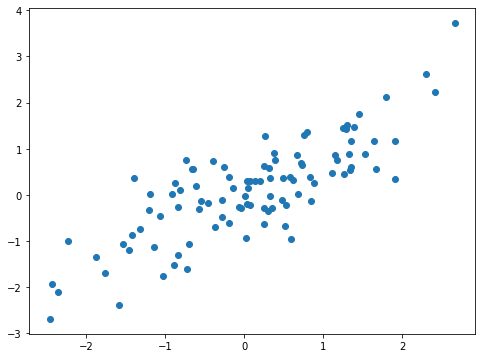

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(cor[:,0],cor[:,1])

In [65]:
pca = PCA(n_components=2)
pca_cor = pca.fit_transform(cor)

In [70]:
pca.components_[0]

array([0.73218557, 0.6811052 ])

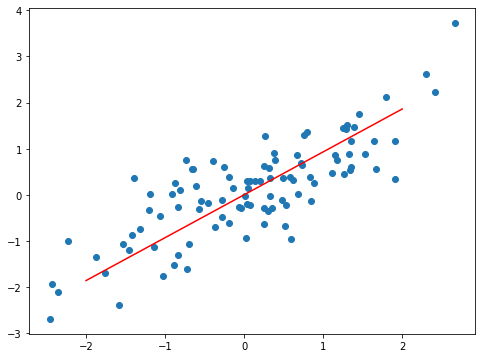

In [76]:
xx = np.linspace(-2,2,50)
yy = (pca.components_[0][1]/pca.components_[0][0])*xx
yy_2 = (pca.components_[1][1]/pca.components_[1][0])*xx
plt.figure(figsize=(8,6))
plt.scatter(cor[:,0],cor[:,1])
plt.plot(xx,yy,c='r')
#plt.plot(xx,yy_2,c='g')

Text(0.5, 0, 'Distance along our line')

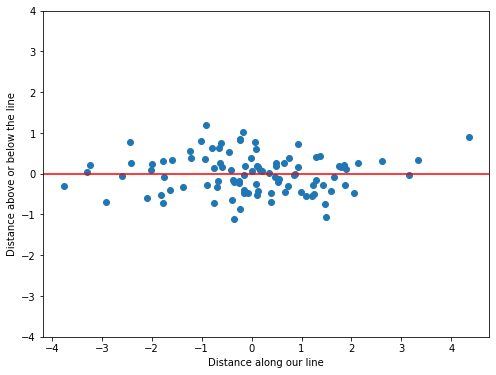

In [84]:
plt.figure(figsize=(8,6))
plt.ylim(-4,4)
plt.scatter(pca_cor[:,0],pca_cor[:,1])
plt.axhline(0,c='r')
plt.ylabel('Distance above or below the line')
plt.xlabel('Distance along our line')

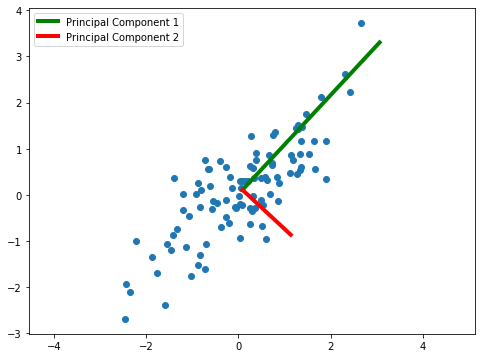

In [85]:
x_origin = cor[:,0].mean()
y_origin = cor[:,1].mean()
x_axis1 = x_origin+pca.components_[0,1]*3*np.sqrt(pca.explained_variance_[0])
y_axis1 = y_origin+pca.components_[0,0]*3*np.sqrt(pca.explained_variance_[0])
x_axis2 = x_origin+pca.components_[1,1]*3*np.sqrt(pca.explained_variance_[1])
y_axis2 = y_origin+pca.components_[1,0]*3*np.sqrt(pca.explained_variance_[1])

plt.figure(figsize=(8,6))
plt.scatter(cor[:,0],cor[:,1])
plt.plot([x_origin, x_axis1],[y_origin, y_axis1], linewidth=4,color='green',label='Principal Component 1')
plt.plot([x_origin, x_axis2],[y_origin, y_axis2], linewidth=4,color='red',label='Principal Component 2')
ax = plt.gca()
ax.axis('equal')
ax.legend()


In [58]:
mnist = pd.read_csv('mnist_train.csv')
mnist.rename({'5':'label'},axis=1,inplace=True)
y = mnist['label']
x = mnist.drop('label', axis=1)

In [4]:
x.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
count,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.0,59999.0,59999.0,59999.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200437,0.088868,0.045634,0.019284,0.015117,0.002000,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042522,3.956222,2.839868,1.686784,1.678297,0.346603,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [101]:
n=10000
pca = PCA(n_components=2)
projected = pca.fit_transform(x[:n])

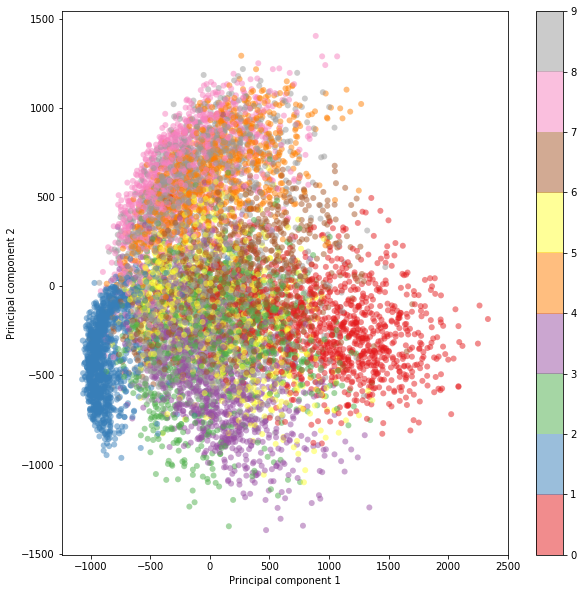

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y[:n], cmap='Set1', edgecolor='none', alpha=0.5,
            )
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar()

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
pca = PCA(n_components=10)
projected = pca.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(projected, y)

In [7]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_pred,y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7683333333333333

In [8]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_pred,y_test)

0.8172

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [36]:
pca.explained_variance_ratio_

array([0.0970481 , 0.07095988, 0.06169185, 0.05389354, 0.04868873,
       0.04312273, 0.03271953, 0.02883928, 0.02762007, 0.02357016])

In [38]:
pca.components_[0]

array([ 4.58950868e-18, -3.06406502e-18,  5.38668864e-19, -4.47635098e-19,
       -7.03605410e-21,  1.20524593e-20,  2.40487200e-20, -4.76305804e-21,
       -2.87556099e-22,  1.16670722e-22, -1.67925824e-23,  4.47584049e-23,
       -1.13016424e-06, -4.44960823e-06, -2.19772841e-06, -9.15720172e-08,
        1.75137229e-23,  5.37286063e-24, -1.80358437e-24,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.46340966e-07,  8.70426012e-07,  8.07862431e-06,  2.07908021e-05,
        2.74500301e-05,  4.43325475e-05,  7.14334341e-05,  9.03625170e-05,
        8.92591007e-05,  7.96240890e-05,  8.37953918e-05,  6.12050176e-05,
        3.32522634e-05,  3.18892632e-05,  1.84457039e-05, -1.32991897e-05,
       -1.08531825e-05,  1.56028347e-06,  1.06871186e-06,  5.04610297e-07,
        0.00000000e+00,  

In [39]:
from sklearn.svm import SVC

In [61]:
pca = PCA(n_components=5)
projected = pca.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(projected, y)

In [7]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_pred,y_test)

NameError: name 'SVC' is not defined

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
import time

In [98]:
pca = PCA(n_components=20)
projected = pca.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(projected, y)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_pred,y_test)

0.9688

In [19]:
times = []
accuracies = []

for n in range(2,15):
    pca = PCA(n_components=n)
    projected = pca.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(projected, y)
    
    start = time.time()
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_pred,y_test))
    end = time.time()
    times.append((end-start))

Text(0.5, 0, 'Number of principal components considered')

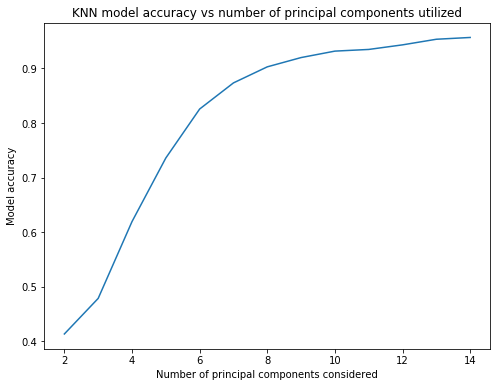

In [100]:
plt.figure(figsize=(8,6))
plt.plot(range(2,15),accuracies)
plt.title('KNN model accuracy vs number of principal components utilized')
plt.ylabel('Model accuracy')
plt.xlabel('Number of principal components considered')

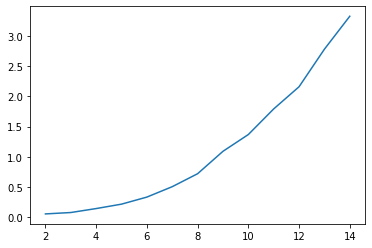

In [21]:
plt.plot(range(2,15),times)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, y)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# for n in range(1,25):
#     start = time.time()
#     y_pred = knn.predict(X_test[:n])
#     end = time.time()
#     print(end-start)

start = time.time()
y_pred = knn.predict(X_test[:25])
end = time.time()
total_complete = end-start

In [95]:
pca = PCA(n_components=20)
projected = pca.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(projected, y)

In [96]:
knn.fit(X_train,y_train)

# for n in range(1,25):
#     start = time.time()
#     y_pred = knn.predict(X_test[:n])
#     end = time.time()
#     print(end-start)

start = time.time()
y_pred = knn.predict(X_test[:25])
end = time.time()
total_PCA = end-start

In [97]:
total_complete/total_PCA

99.32392745508879

In [ ]:
KNeighborsClassifier()